# Data cleaning and Transformation
handle missing values

# importing packages

In [1]:
import missingno as msno
import pandas as pd
import logging
import sys
import os

sys.path.append(os.path.abspath(os.path.join("../script")))
from utils import percent_missing,format_float, find_agg, missing_values_table,convert_bytes_to_megabytes,fix_missing_ffill,fix_missing_bfill

# extracting dataset

In [5]:
import pandas as pd
from sqlalchemy import create_engine

database_name = 'week1'
table_name= 'xdr_data'

connection_params = { "host": "localhost", "user": "postgres", "password": "pgadmin",
                    "port": "5432", "database": database_name}

engine = create_engine(f"postgresql+psycopg2://{connection_params['user']}:{connection_params['password']}@{connection_params['host']}:{connection_params['port']}/{connection_params['database']}")

# str or SQLAlchemy Selectable (select or text object)
sql_query = 'SELECT * FROM xdr_data'

df = pd.read_sql(sql_query, con= engine)


### looking the information of the dataset
the data contains 150001 rows and 55 columns with data type of floats and objectes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [7]:
# identify thos which do not have missing values
i = 0
for key, item in df.isnull().sum().items():
    if item==0:
        i+=1
        print(key)
print('the dataset contain {} columns with no missing values'.format(i))

Social Media DL (Bytes)
Social Media UL (Bytes)
Google DL (Bytes)
Google UL (Bytes)
Email DL (Bytes)
Email UL (Bytes)
Youtube DL (Bytes)
Youtube UL (Bytes)
Netflix DL (Bytes)
Netflix UL (Bytes)
Gaming DL (Bytes)
Gaming UL (Bytes)
Other DL (Bytes)
Other UL (Bytes)
the dataset contain 14 columns with no missing values


In [9]:
#get those who has missing values
columns = []
counts=[]
i=0
for key, item in df.isnull().sum().items():
    if item != 0:
        columns.append(key)
        counts.append(item)
        i+=1
print('the dataset has {} columns with missing values'.format(i))
pd.DataFrame({'column name':columns,'counts':counts})

the dataset has 41 columns with missing values


,column name,counts
0,Bearer Id,991
1,Start,1
2,Start ms,1
3,End,1
4,End ms,1
5,Dur. (ms),1
6,IMSI,570
7,MSISDN/Number,1066
8,IMEI,572
9,Last Location Name,1153


<Axes: >

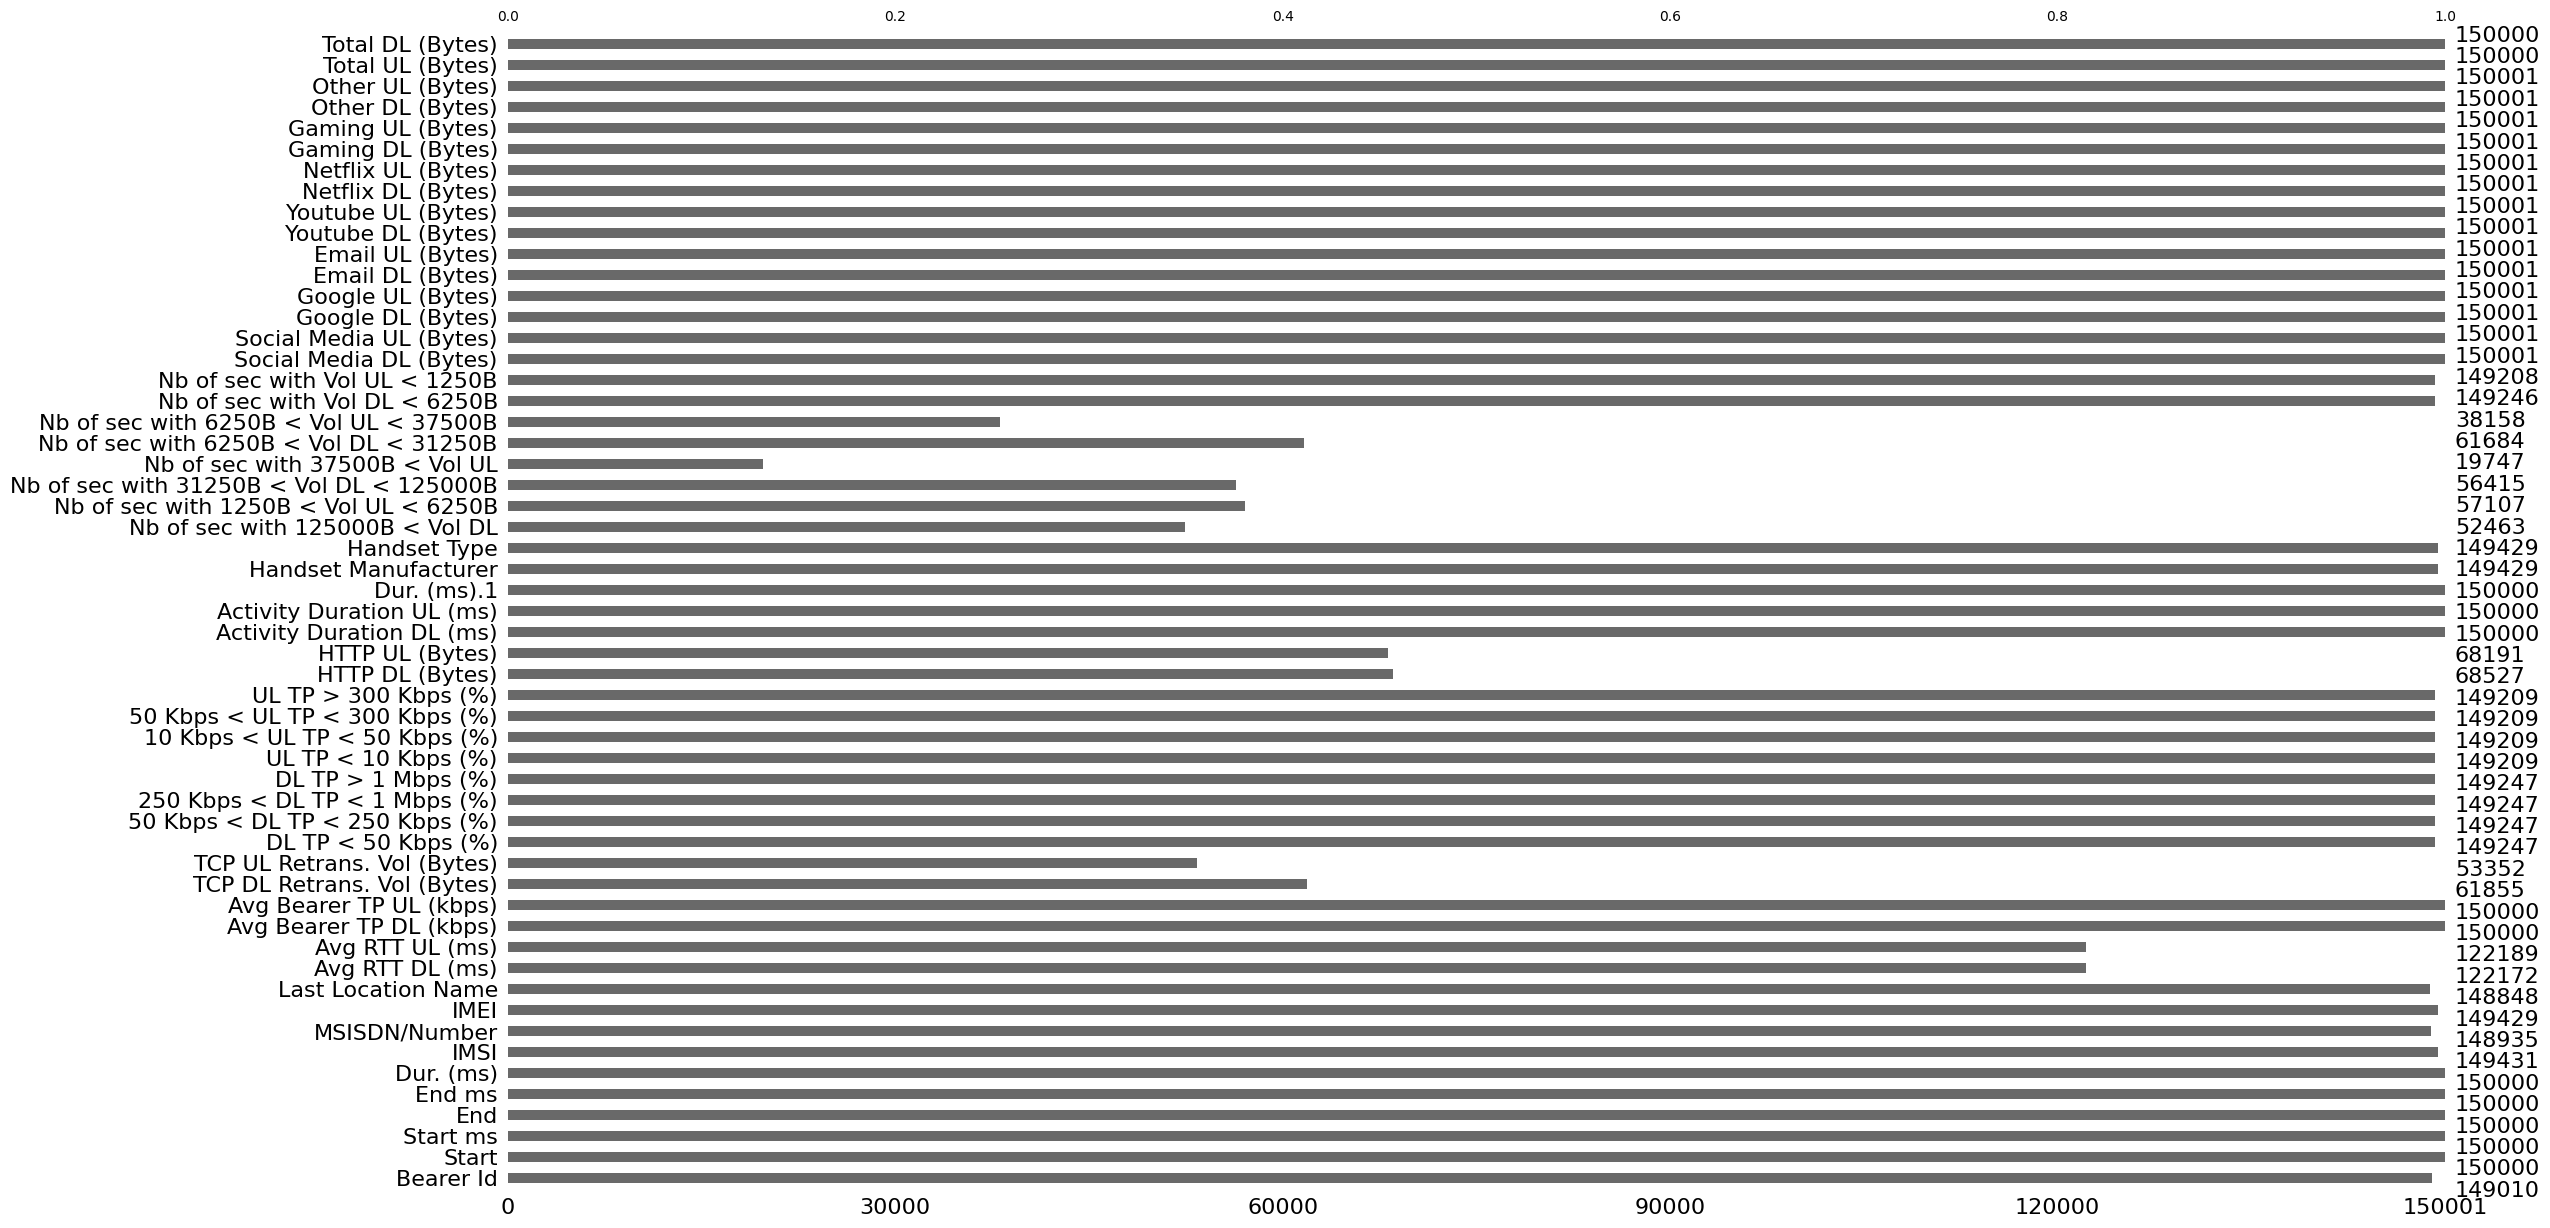

In [10]:
# fig = missing_values.plot(kind='bar', fontsize=12,
#                           figsize=(10, 6), rot=45).get_figure()
# fig.savefig("missing_values_bar_chart.png")
msno.bar(df)

<Axes: >

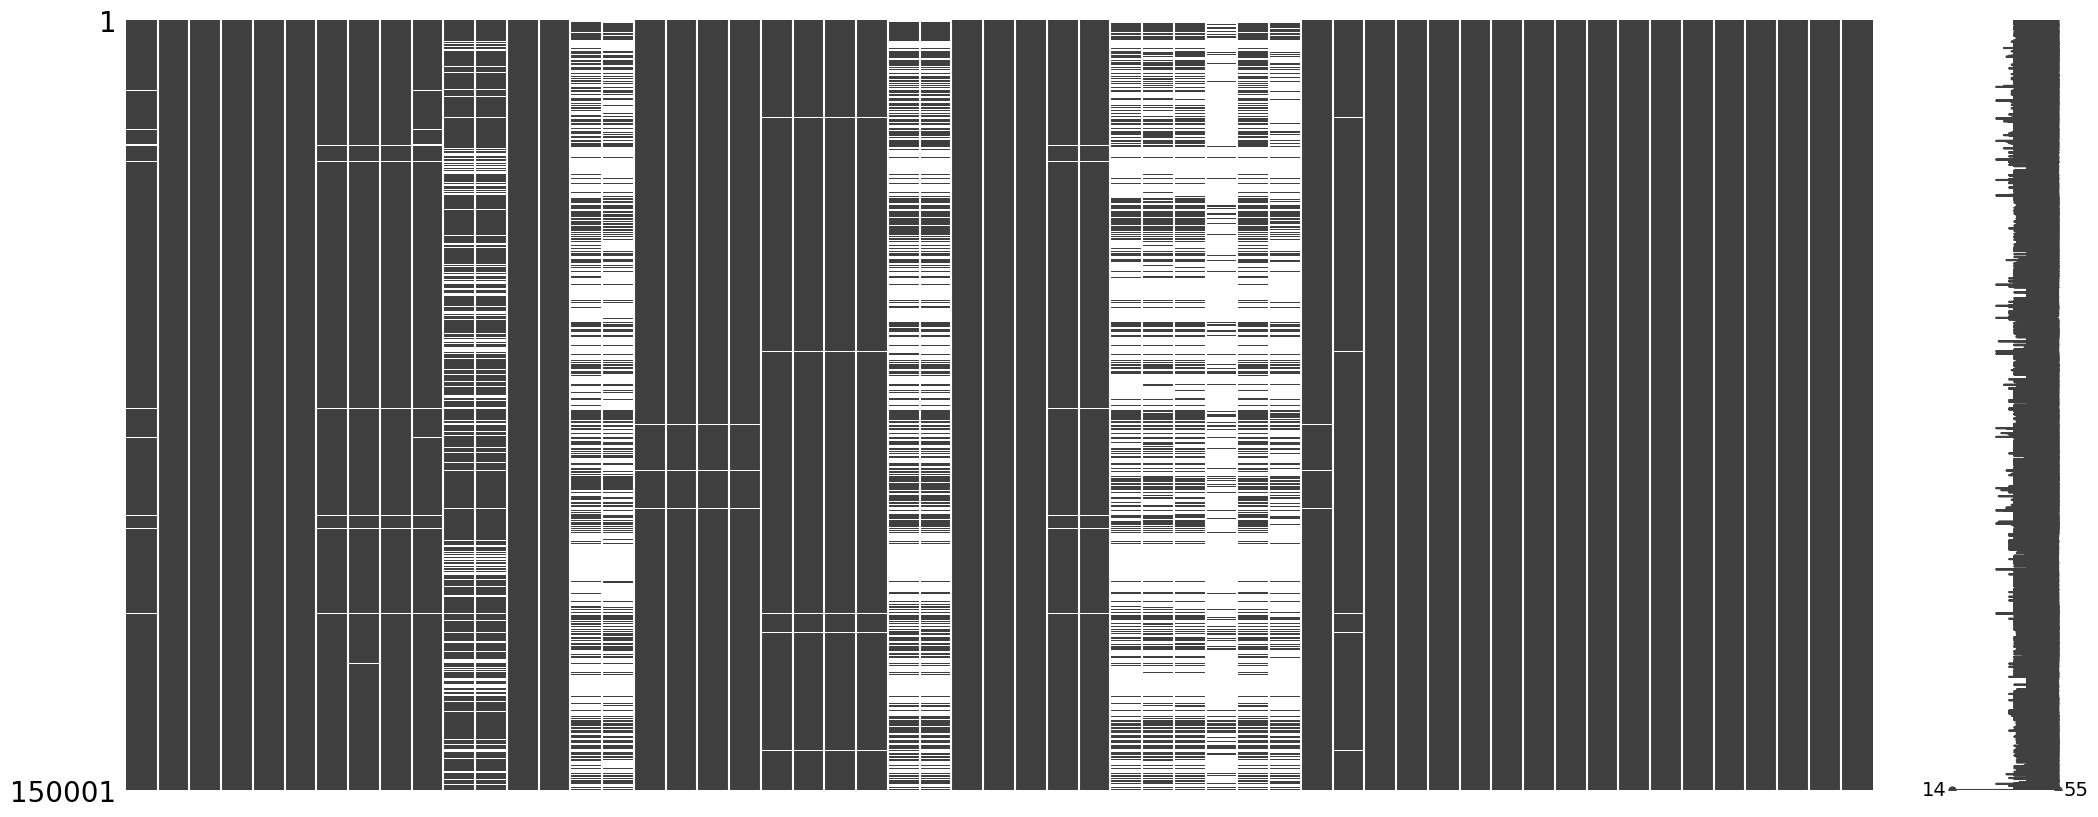

In [11]:
msno.matrix(df)
